## Imports

In [3]:
# Uncomment this cell if running on Colab

#!pip install plotly --upgrade

In [4]:
import nltk
import pandas as pd
import numpy as np
import plotly.express as px
import string
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/guillaumearp/nltk_data...
[nltk_data]    

True

In [6]:
## Source article: https://www.reuters.com/world/africa/safrica-says-it-is-being-punished-early-covid-variant-detection-2021-11-27/

article_text = '''
JOHANNESBURG, Nov 27 (Reuters) - South Africa said on Saturday it was being punished for its advanced ability to detect new COVID-19 variants early, as travel bans and restrictions imposed because of the new Omicron variant threaten to harm tourism and other sectors of the economy.

South Africa has some of the world's top epidemiologists and scientists, who have managed to detect emerging coronavirus variants and their mutations early on in their life cycle. The Omicron variant was first discovered in South Africa and has since been detected in Belgium, Botswana, Israel and Hong Kong.

"This latest round of travel bans is akin to punishing South Africa for its advanced genomic sequencing and the ability to detect new variants quicker," the Ministry of International Relations and Cooperation said.

"Excellent science should be applauded and not punished," it said in a statement.

Many nations rushed on Friday and Saturday to announce travel curbs to South Africa and other countries in the region.

The foreign ministry noted that while the new variant was also detected in other countries, the global reaction to those countries have been "starkly different" to cases in southern Africa.

The new variant was first announced on Wednesday by a team of scientists in South Africa who said they had detected a variant that could possibly evade the body's immune response and make it more transmissible.

On Friday the World Health Organization named it Omicron and designated it as a "variant of concern" - its most serious level - saying preliminary evidence suggests an increased risk of re-infection. read more

"Our immediate concern is the damage that these restrictions are causing to families, the travel and tourism industries and business," South African Foreign Minister Naledi Pandor said in the statement.

The government was engaging with countries that have imposed travel bans to persuade them to reconsider, it added.

On Friday, the WHO cautioned countries against hastily imposing travel restrictions linked to the variant, saying they should take a "risk-based and scientific approach".'''

## Tokenization

In [7]:
sentence_tokens = nltk.sent_tokenize(article_text)

In [8]:
word_tokens = nltk.word_tokenize(article_text.lower())

In [9]:
freq_dist_words = nltk.FreqDist(word_tokens)

In [10]:
df_freq = pd.DataFrame.from_dict(freq_dist_words, orient='index', columns=['Frequency']).reset_index()
df_freq.sort_values('Frequency', ascending=False, inplace=True)
top_20_words = df_freq.head(20)
top_20_words = top_20_words.rename(columns={'index': 'Word'})

In [11]:
fig = px.bar(top_20_words, x='Word', y='Frequency', color='Frequency')

fig.update_layout(height=800, width=1200, template='plotly_dark', title='Distribution of Top 20 Words From Article')
fig.show()

## Stopwords Removal

In [12]:
word_tokens_clean = []
my_punct = ["''", "``", '""', "'s", '-']

for word in word_tokens:
  if word not in nltk.corpus.stopwords.words('english'):
    if word not in string.punctuation:
      if word not in my_punct:
        word_tokens_clean.append(word)

print(word_tokens_clean)

['johannesburg', 'nov', '27', 'reuters', 'south', 'africa', 'said', 'saturday', 'punished', 'advanced', 'ability', 'detect', 'new', 'covid-19', 'variants', 'early', 'travel', 'bans', 'restrictions', 'imposed', 'new', 'omicron', 'variant', 'threaten', 'harm', 'tourism', 'sectors', 'economy', 'south', 'africa', 'world', 'top', 'epidemiologists', 'scientists', 'managed', 'detect', 'emerging', 'coronavirus', 'variants', 'mutations', 'early', 'life', 'cycle', 'omicron', 'variant', 'first', 'discovered', 'south', 'africa', 'since', 'detected', 'belgium', 'botswana', 'israel', 'hong', 'kong', 'latest', 'round', 'travel', 'bans', 'akin', 'punishing', 'south', 'africa', 'advanced', 'genomic', 'sequencing', 'ability', 'detect', 'new', 'variants', 'quicker', 'ministry', 'international', 'relations', 'cooperation', 'said', 'excellent', 'science', 'applauded', 'punished', 'said', 'statement', 'many', 'nations', 'rushed', 'friday', 'saturday', 'announce', 'travel', 'curbs', 'south', 'africa', 'count

In [13]:
freq_dist_words_clean = nltk.FreqDist(word_tokens_clean)

In [14]:
df_freq_clean = pd.DataFrame.from_dict(freq_dist_words_clean, orient='index', columns=['Frequency']).reset_index()
df_freq_clean.sort_values('Frequency', ascending=False, inplace=True)
top_20_words_clean = df_freq_clean.head(20)
top_20_words_clean = top_20_words_clean.rename(columns={'index': 'Word'})

In [15]:
fig = px.bar(top_20_words_clean, x='Word', y='Frequency', color='Frequency')

fig.update_layout(height=800, width=1200, template='plotly_dark', title='Distribution of Top 20 Words From Article')
fig.show()


## Stemming

In [16]:
stem_en = nltk.stem.SnowballStemmer("english")

In [17]:
stemmed_words = [stem_en.stem(word) for word in word_tokens_clean]

In [18]:
freq_dist_words_stem = nltk.FreqDist(stemmed_words)

In [19]:
df_freq_stem = pd.DataFrame.from_dict(freq_dist_words_stem, orient='index', columns=['Frequency']).reset_index()
df_freq_stem.sort_values('Frequency', ascending=False, inplace=True)
top_20_words_stem = df_freq_stem.head(20)
top_20_words_stem = top_20_words_stem.rename(columns={'index': 'Word'})

In [20]:
fig = px.bar(top_20_words_stem, x='Word', y='Frequency', color='Frequency')

fig.update_layout(height=800, width=1200, template='plotly_dark', title='Distribution of Top 20 Words From Article (stemmed)')
fig.show()

## Lemmatizing

In [21]:
nlp = spacy.load("en_core_web_sm")

string_words = ' '.join([str(word) for word in word_tokens_clean])
nlp_tokens = nlp(string_words)

word_tokens_lemma = [word.lemma_ for word in nlp_tokens]

In [22]:
# Looks like some punctuation came back, let's get rid of it again

word_tokens_lemma_2 = []

for word in word_tokens_lemma:
  if word not in string.punctuation:
    word_tokens_lemma_2.append(word)

In [23]:
freq_dist_words_lemm = nltk.FreqDist(word_tokens_lemma_2)

In [24]:
df_freq_lemm = pd.DataFrame.from_dict(freq_dist_words_lemm, orient='index', columns=['Frequency']).reset_index()
df_freq_lemm.sort_values('Frequency', ascending=False, inplace=True)
top_20_words_lemm = df_freq_lemm.head(20)
top_20_words_lemm = top_20_words_lemm.rename(columns={'index': 'Word'})

In [25]:
# Putting 2 charts next to each other to compare

fig = px.bar(top_20_words_stem, x='Word', y='Frequency', color='Frequency', labels={'Word': 'Stemmed Words'})

fig.update_layout(height=450, width=1100, template='plotly_dark', title='Distribution of Top 20 Words From Article (stemmed)')
fig.show()

fig = px.bar(top_20_words_lemm, x='Word', y='Frequency', color='Frequency', labels={'Word': 'Lemmatized Words'})

fig.update_layout(height=450, width=1100, template='plotly_dark', title='Distribution of Top 20 Words From Article (lemmatized)')
fig.show()

Both frequency lists look roughly the same, some words are better captured in the lemmatized list (like the verb say, instead of say and said on two occurrences), but the overall distribution is comparable. We can note though that words are more readable in the lemmatized version, as they are actual words and not words missing some letters.

## Word Clouds

In [26]:
# Word Cloud shape initialization

wordcloud = WordCloud(width=1000, height=1000, max_font_size=300, min_font_size=10)

### From raw text

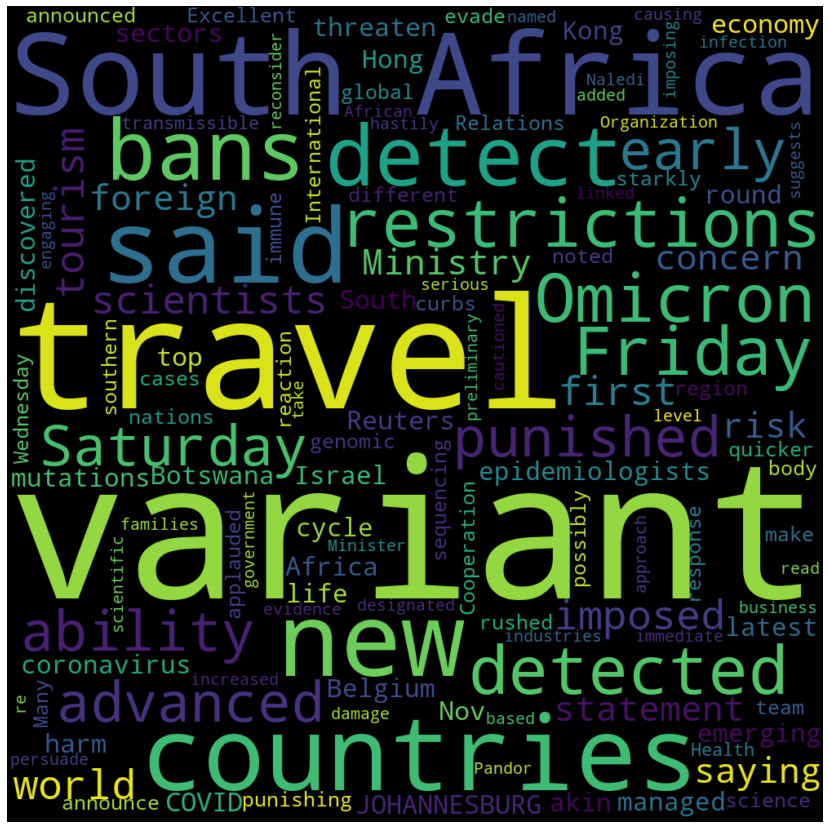

In [27]:
wordcloud.generate_from_text(article_text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### From cleaned frequency distribution

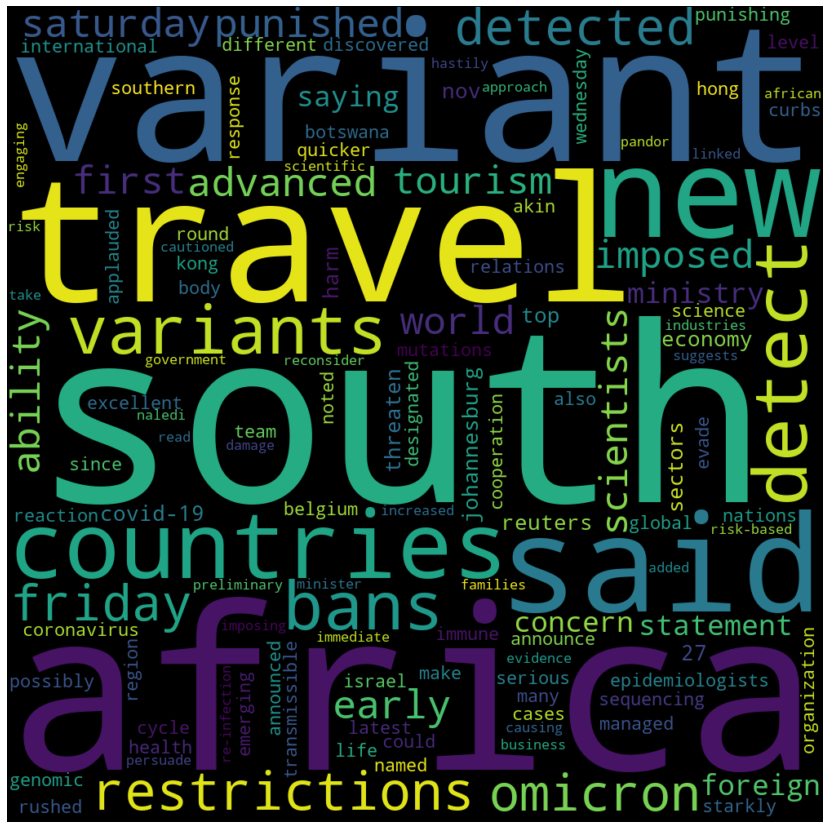

In [28]:
wordcloud.generate_from_frequencies(freq_dist_words_clean)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### From stemmed frequency distribution

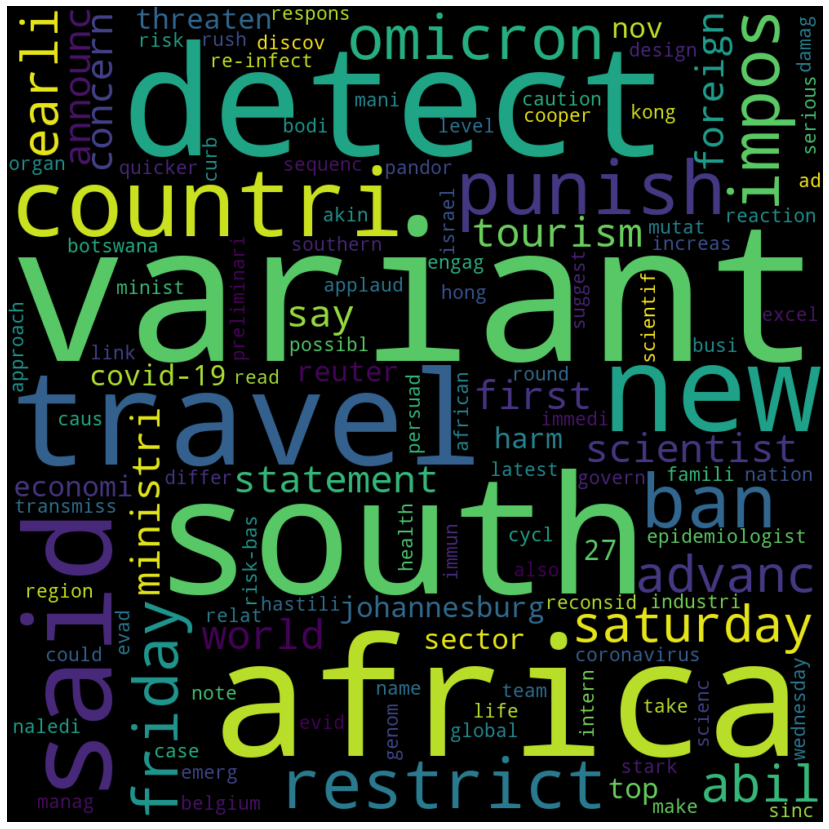

In [29]:
wordcloud.generate_from_frequencies(freq_dist_words_stem)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### From lemmatize frequency distribution

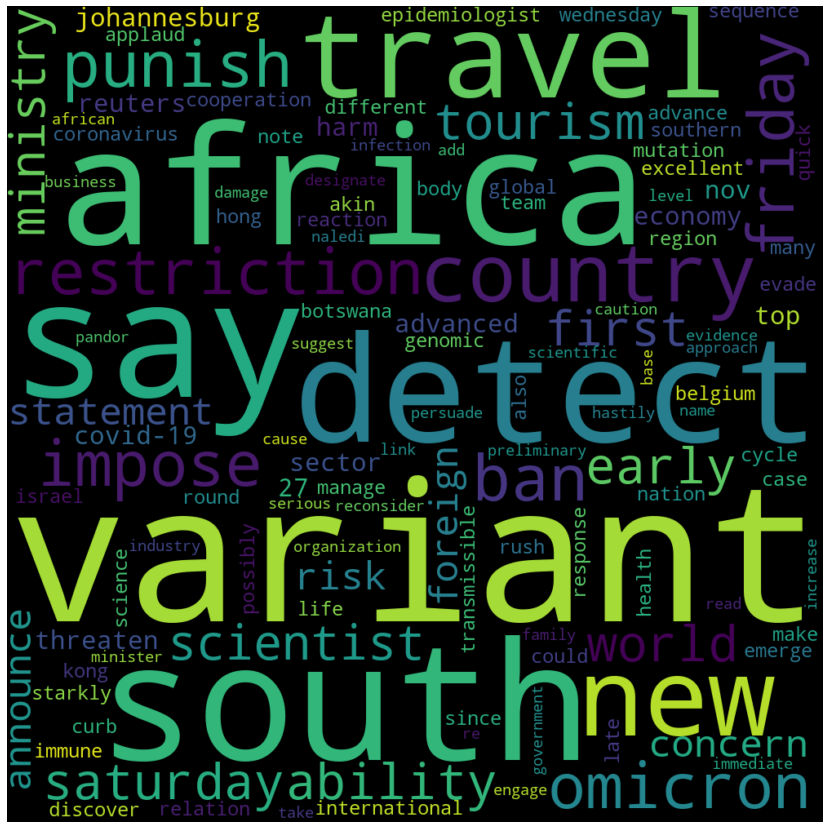

In [30]:
wordcloud.generate_from_frequencies(freq_dist_words_lemm)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()